In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('../../data/processed/data.csv', index_col=0) #<-Load w/out the unnecessary 'Unnamed:0' column.
data.head()

,Major,Minor,SalePrice,DocumentDate,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,...,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,YrBuilt,YrRenovated,SqFtLot,Township,AirportNoise,WfntFootage
0,638580,110,190000,07/14/2015,98188,1.0,7.0,3.0,4.0,2.0,...,0.0,0.0,300.0,5.0,1963.0,0.0,10534.0,23.0,0.0,0.0
1,126320,110,375000,10/30/2017,98106,2.0,6.0,3.0,3.0,1.0,...,0.0,0.0,0.0,4.0,1919.0,0.0,4760.0,24.0,0.0,0.0
2,213043,120,560000,12/20/2019,98019,1.0,7.0,3.0,3.0,2.0,...,180.0,0.0,0.0,5.0,1989.0,0.0,10523.0,26.0,0.0,0.0
3,940652,630,435000,07/22/2019,98038,2.0,7.0,3.0,3.0,3.0,...,45.0,0.0,0.0,5.0,1994.0,0.0,7392.0,22.0,0.0,0.0
4,322303,9088,133000,12/05/2016,98070,1.5,6.0,3.0,1.0,2.0,...,0.0,70.0,480.0,4.0,1918.0,1980.0,136060.0,23.0,0.0,242.0


In [6]:
data.describe()

,Major,Minor,SalePrice,ZipCode,Stories,BldgGrade,Condition,Bedrooms,Bathrooms,SqFtTotLiving,...,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,YrBuilt,YrRenovated,SqFtLot,Township,AirportNoise,WfntFootage
count,141545.000000,141545.000000,1.415450e+05,1.415450e+05,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,...,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,141545.000000,1.415450e+05,141545.000000,141545.0,141545.000000
mean,448728.218736,1562.838405,6.942912e+05,1.050155e+05,1.440351,7.577541,3.565227,3.402049,2.495871,2089.849596,...,65.869031,6.481691,140.719750,4.912925,1969.382493,116.526278,4.588788e+04,23.792412,0.0,8.071666
std,286620.447904,2851.067000,8.054475e+05,2.607710e+06,0.507238,1.190614,0.744951,0.950776,1.006218,956.901555,...,121.868734,42.291230,218.450465,1.044588,29.042281,468.617484,8.046268e+05,1.650141,0.0,183.441218
min,100.000000,1.000000,5.000000e+00,3.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,3.750000e+02,19.000000,0.0,0.000000
25%,202504.000000,115.000000,3.790000e+05,9.803200e+04,1.000000,7.000000,3.000000,3.000000,2.000000,1420.000000,...,0.000000,0.000000,0.000000,5.000000,1951.000000,0.000000,5.500000e+03,23.000000,0.0,0.000000
50%,383206.000000,326.000000,5.560000e+05,9.805900e+04,1.000000,7.000000,3.000000,3.000000,3.000000,1910.000000,...,0.000000,0.000000,0.000000,5.000000,1970.000000,0.000000,7.980000e+03,24.000000,0.0,0.000000
75%,722921.000000,1017.000000,8.000000e+05,9.811800e+04,2.000000,8.000000,4.000000,4.000000,3.000000,2550.000000,...,90.000000,0.000000,220.000000,5.000000,1992.000000,0.000000,1.140000e+04,25.000000,0.0,0.000000
max,990600.000000,9689.000000,6.250000e+07,9.811820e+08,4.000000,13.000000,5.000000,15.000000,16.000000,14980.000000,...,11570.000000,2330.000000,4290.000000,8.000000,2020.000000,2020.000000,2.330525e+07,26.000000,0.0,5300.000000


## Selecting Features

Since 'SalePrice is the target variable for my analysis, I will take a look at the distribution.

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


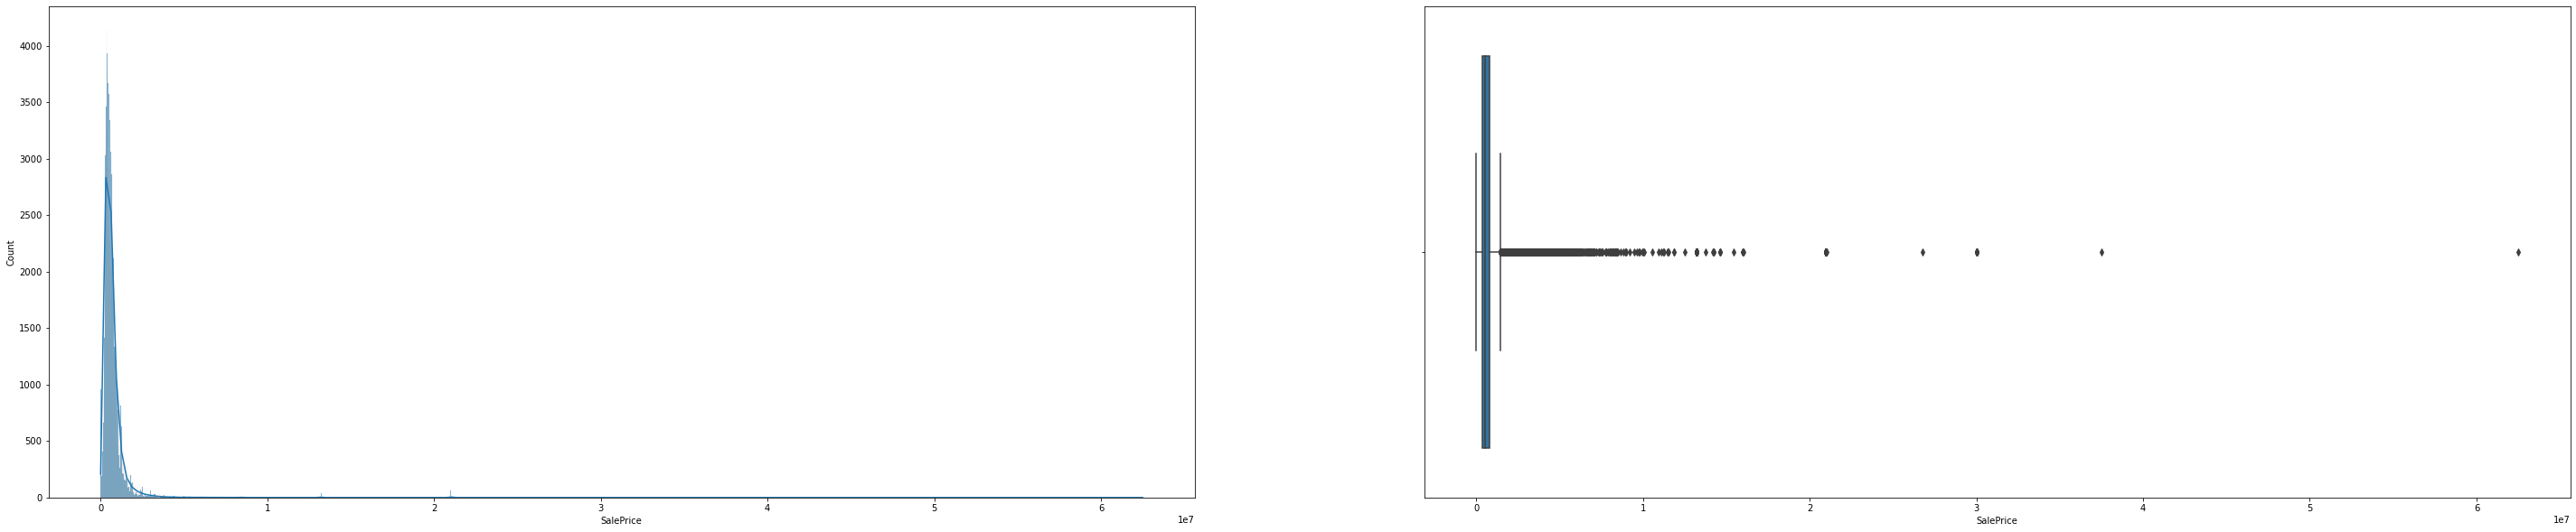

In [14]:
fig, ax = plt.subplots(1,2, figsize=(50,10))
sns.histplot(data.SalePrice, kde = True, ax = ax[0])
sns.boxplot(data.SalePrice, ax= ax[1]);

The data is largely skewed but the shape is decent. I will take a closer look at correlations of features I'd consider using in my model.

In [15]:
data[['SalePrice','BldgGrade','ZipCode','SqFtTotLiving','WfntFootage']].corr()

,SalePrice,BldgGrade,ZipCode,SqFtTotLiving,WfntFootage
SalePrice,1.000000,0.385261,-0.000397,0.388234,-0.014740
BldgGrade,0.385261,1.000000,0.000939,0.757756,-0.108447
ZipCode,-0.000397,0.000939,1.000000,-0.002372,-0.000118
SqFtTotLiving,0.388234,0.757756,-0.002372,1.000000,-0.050261
WfntFootage,-0.014740,-0.108447,-0.000118,-0.050261,1.000000
